# MSIN0143 Group P Coursework

In [12]:
# CODE TO GET THE WORD COUNT
import io
from IPython.nbformat import current

with io.open('Final_Notebook.ipynb', 'r', encoding='utf-8') as f:
    nb = current.read(f, 'json')

word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print(word_count-183) #the 183 deducted is from the appendix and references

2000


## 1. Business Problem

Being able to minimise the rate of patients not showing up for an allocated appointment is of paramount interest to any medical practice. Unused capacity and misallocation of resources arise as a result of the no-shows, as the booked time slots can be used more efficiently. In order to reduce the monetary losses associated with this problem, it is necessary to understand the behavior behind no-shows, and be able to identify and predict which patients are associated with not showing up. With an accurate prediction model, the medical practitioners would be able to intervene in advance and better mitigate the risks of no shows.<br><br>
For this case, we have picked a medical practice in Brazil. Our goal is to identify which characteristics are strongly associated with no-show behavior and to be able to predict the probability of a no-show for any given patient. With the outcome of our prediction model, we can provide the upper management with the best recommendations for which measures to implement to reduce the costs of no-shows in the future.<br><br>
More specifically, we will strive to offer our client guidance in three parts:<br>
- Investigate general patterns and provide information about the patients.<br>
- Explore relationships between no show behaviour and the characteristics of the patients.<br>
- Build a prediction model, that can accurately predict the likelihood of patients not showing up.


## 2. The Dataset

In [9]:
# Create dataframe with variable names and description 
pd.options.display.max_colwidth = 100

data = [['Patient ID',  "Identification of a patient"], ['Appointment ID', "Identification of each appointment"],
        ['Gender', "Male or Female"], ['Scheduled Day', "The day the patient scheduled/registered an appointment"],
       ['Appointment Day', "The day of the actual appointment, when they have to visit the doctor"],['Age', "How old is the patient"],
        ['Neighbourhood', "Where the appointment takes place"],['Scholarship', "Receiving financial aid from welfare program (True of False)"],
       ['Hypertension', "Whether or not patient is diagnosed with Hypertension"],
       ['Diabetes', "Whether or not patient is diagnosed with Diabetes"],['Alcoholism', "Whether or not patient is diagnosed with Alcoholism"],
        ['Handicap', "Whether or not patient may have any handicaps"],['SMS received', "Whether or not patient received 1 or more notifications about their appointment"],
        ['No Show', "Whether or not the patient showed up for the appointment (Yes or no)"]] 
  
df = pd.DataFrame(data, columns = ['Variable', 'Description']) 
df 

,Variable,Description
0,Patient ID,Identification of a patient
1,Appointment ID,Identification of each appointment
2,Gender,Male or Female
3,Scheduled Day,The day the patient scheduled/registered an appointment
4,Appointment Day,"The day of the actual appointment, when they have to visit the doctor"
5,Age,How old is the patient
6,Neighbourhood,Where the appointment takes place
7,Scholarship,Receiving financial aid from welfare program (True of False)
8,Hypertension,Whether or not patient is diagnosed with Hypertension
9,Diabetes,Whether or not patient is diagnosed with Diabetes


## 3. Exploration of the data

### 3.1 Importing libraries and loading the dataset

In [3]:
pip install pydot

  Using cached https://files.pythonhosted.org/packages/33/d1/b1479a770f66d962f545c2101630ce1d5592d90cb4f083d38862e93d16d2/pydot-1.4.1-py2.py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [4]:
# General
import pandas as pd
import numpy as np
import seaborn as sns

# Visualisation
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats

# Modelling, Metrics and Tree Visualisation
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import export_graphviz, DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
import pydot
from sklearn import metrics
from sklearn.metrics import accuracy_score
from IPython.display import Image
from sklearn import tree
import graphviz



In [5]:
# Set option to print all rows of long output
pd.set_option('display.max_rows', None)

In [6]:
# Load the dataset
noshow = pd.read_csv("Medical noshow.csv")

# Take a look at first five observations
noshow.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [7]:
# Correct spelling mistakes of variable names
noshow.columns = ['PatientID', 'AppointmentID', 'Gender', 'ScheduledDay', 
              'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
              'Diabetes', 'Alcoholism', 'Handicap', 'SmsReceived', 'NoShow']

### 3.2 Check for missing values

In [8]:
noshow.isnull().sum()

PatientID         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hypertension      0
Diabetes          0
Alcoholism        0
Handicap          0
SmsReceived       0
NoShow            0
dtype: int64

As is shown by the output, there are no missing values in the dataset

### 3.3 Check datatypes

In [9]:
noshow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientID         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SmsReceived       110527 non-null int64
NoShow            110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


<u>Required Modifications:</u> 
- PatientID is recorded as float and AppointmentID as integer, so they should be changed to categorical<br>
- ScheduledDay and AppointmentDay should be recorded as dates<br>
- Change NoShow and Gender to binary variables

## 3.4 Transform the variables

In [10]:
#Transform datatypes
noshow.AppointmentDay = noshow.AppointmentDay.apply(np.datetime64)
noshow.ScheduledDay = noshow.ScheduledDay.apply(np.datetime64)
noshow.PatientID = noshow.PatientID.astype('category')
noshow.AppointmentID = noshow.AppointmentID.astype('category')

#Create variables
noshow['NoShow_d']= noshow['NoShow'].apply(lambda x: 0 if x =="No" else 1)
noshow['Female']= noshow['Gender'].apply(lambda x: 0 if x =="M" else 1)
noshow.head()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SmsReceived,NoShow,NoShow_d,Female
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,1
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,1
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,1
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,1


## 3.5 Summarise all variables

In [11]:
noshow.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SmsReceived,NoShow_d,Female
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.201933,0.649977
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444,0.476979
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000


<u>Issues Identified:</u>
- Age has outliers (min = -1)<br>
- Handicap also has outliers (max = 4), as it is supposed to be a binary variable

## 3.6 Group variables by type for better exploration

In [12]:
target = ["NoShow"]
ID = ["PatientID", "AppointmentID"]
binary = ["Scholarship", "Hypertension", "Diabetes", "Alcoholism", "Handicap", "SmsReceived", "Female"]
categorical = ["Neighbourhood"]
datetime = ["AppointmentDay", "ScheduledDay"]
numerical = ["Age"]

### 3.6.1 Target variable

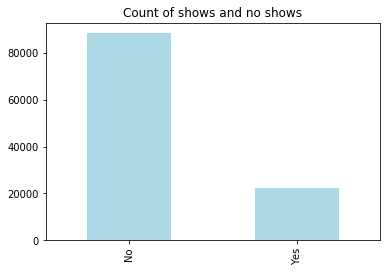

In [13]:
noshow['NoShow'].value_counts().plot.bar(title = "Count of shows and no shows", color = "lightblue")

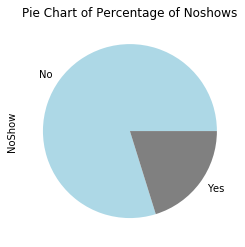

In [14]:
noshow['NoShow'].value_counts().plot.pie(title = "Pie Chart of Percentage of Noshows", colors = ["lightblue", "grey"])

In [15]:
# Get percentages
NoShowPerc = round(len(noshow.loc[noshow.NoShow == "Yes"])/len(noshow.loc[: , "NoShow"])*100,2)
print("The percentage of No-Shows is {0}%".format( NoShowPerc))

The percentage of No-Shows is 20.19%


### 3.6.2 ID variables

In [16]:
print("Number of Patients: {0}  Number of Appointments: {1}".format(noshow.PatientID.nunique(),noshow.AppointmentID.nunique()))
print("On average, each patient books {0} Appointments".format(round(noshow.AppointmentID.nunique()/noshow.PatientID.nunique(),2)))

# Check how many patients there are for each number of appointments
patid = noshow['PatientID'].value_counts()
patid = patid.value_counts()
patid = patid.to_frame("Number of Patients")
patid.index.name = "Number of Appointments"
patid

Number of Patients: 62299  Number of Appointments: 110527
On average, each patient books 1.77 Appointments


,Number of Patients
Number of Appointments,
1,37920
2,13895
3,5500
4,2367
5,1119
6,553
7,306
8,202
9,104


### 3.6.3 Binary variables

In [17]:
# Inspect the outliers from earlier
noshow.Handicap.unique()
noshow.Handicap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handicap, dtype: int64

In [18]:
# Drop the observations where Handicap values is above 1
noshow.drop(noshow.loc[noshow['Handicap'] >= 2].index, inplace=True) 

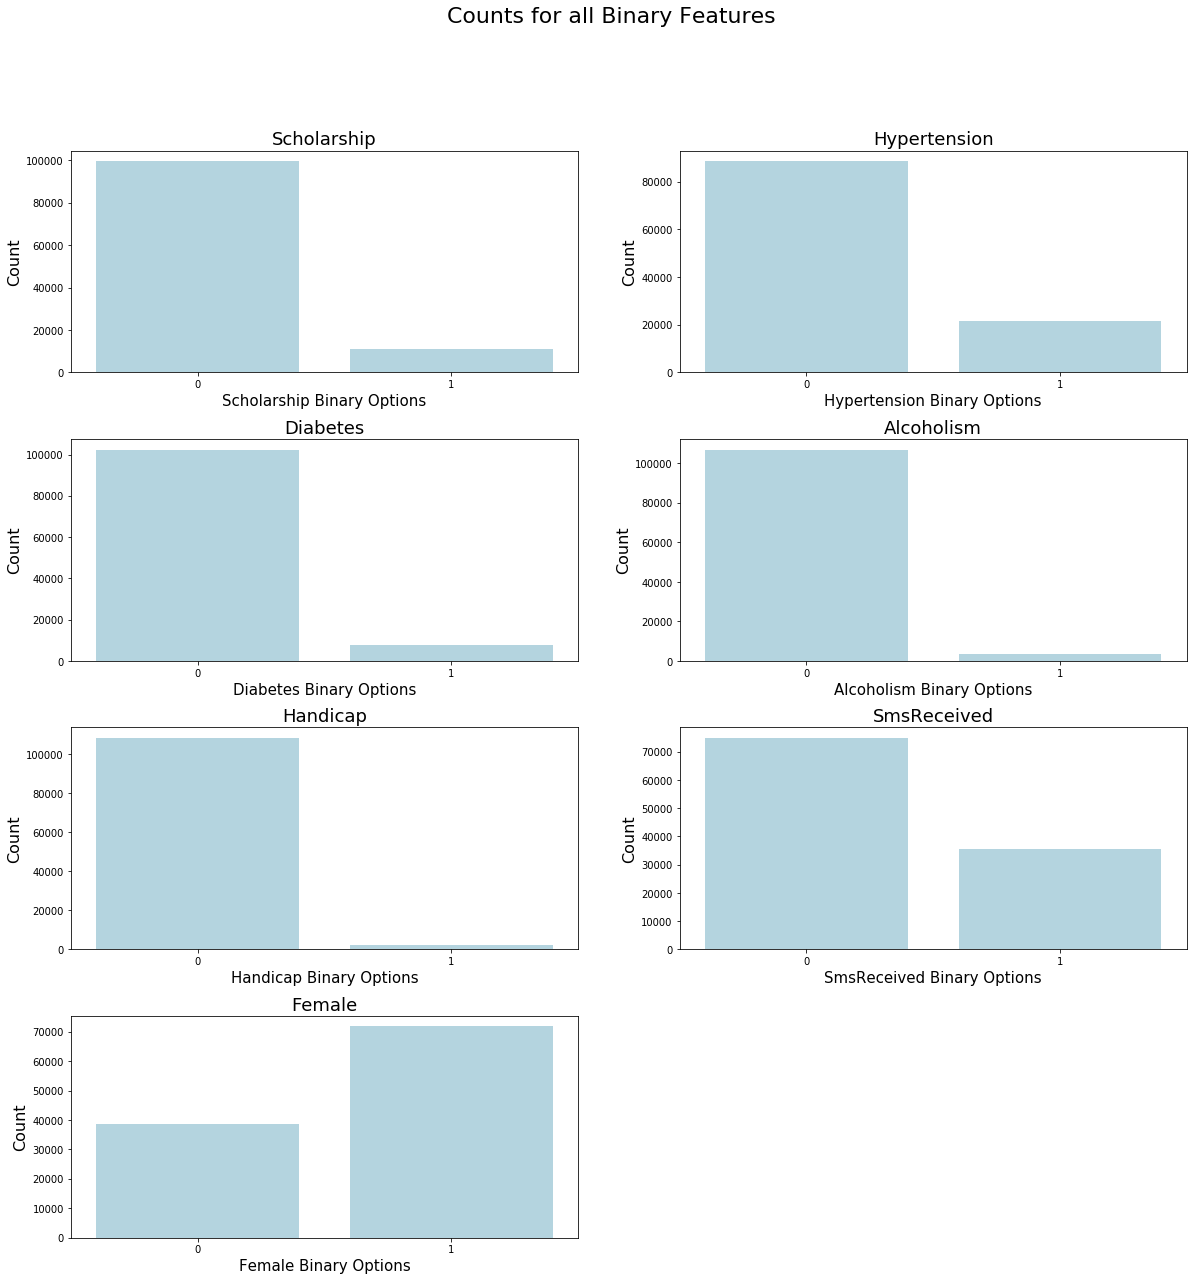

In [19]:
# Look at the distribution of the binary variables
target = ['NoShow']
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20,20))
fig.subplots_adjust(hspace=0.3)
fig.suptitle('Counts for all Binary Features', fontsize=22)
axes[3][1].set_visible(False)

for ax, catplot in zip(axes.flatten(), noshow[binary].columns):
    sns.countplot(x=catplot, data=noshow, ax=ax, color='lightblue')
    ax.set_title(catplot, fontsize=18)
    ax.set_ylabel('Count', fontsize=16)
    ax.set_xlabel(f'{catplot} Binary Options', fontsize=15)

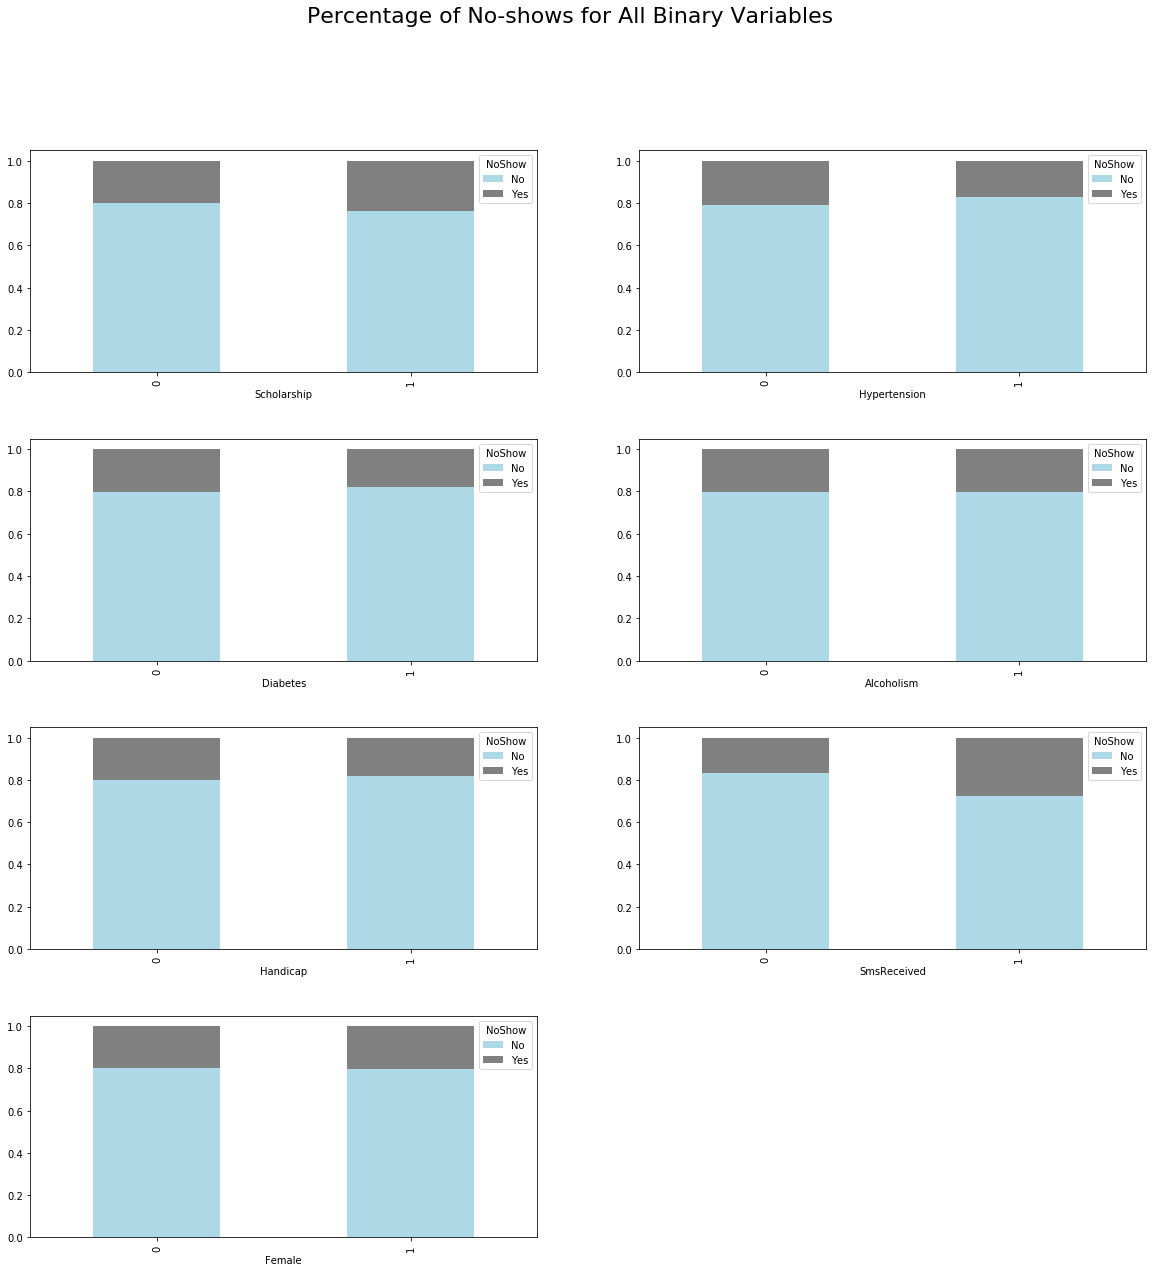

In [20]:
#Look at how the binary variables relate to the target variable

# Crosstab binary variables with percentage of No-shows
ct_scholar = pd.crosstab(noshow.Scholarship, noshow.NoShow, normalize='index')
ct_hyper = pd.crosstab(noshow.Hypertension, noshow.NoShow, normalize='index')
ct_diabetes = pd.crosstab(noshow.Diabetes, noshow.NoShow, normalize='index')
ct_alcohol = pd.crosstab(noshow.Alcoholism, noshow.NoShow, normalize='index')
ct_handicap = pd.crosstab(noshow.Handicap, noshow.NoShow, normalize='index')
ct_sms = pd.crosstab(noshow.SmsReceived, noshow.NoShow, normalize='index')
ct_gender = pd.crosstab(noshow.Female, noshow.NoShow, normalize='index')

#Visualize the probability of no-shows per weekday for Appointment Day and Scheduled Day
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20,20))
fig.subplots_adjust(hspace=0.3)
fig.suptitle('Percentage of No-shows for All Binary Variables', fontsize=22)
ct_scholar.plot.bar(stacked=True, color=['lightblue', 'grey'], ax=axes[0][0])
axes[0][0].legend(title='NoShow', loc ='upper right')
ct_hyper.plot.bar(stacked=True, color=['lightblue', 'grey'], ax=axes[0][1])
axes[0][1].legend(title='NoShow', loc ='upper right')
ct_diabetes.plot.bar(stacked=True, color=['lightblue', 'grey'], ax=axes[1][0])
axes[1][0].legend(title='NoShow', loc ='upper right')
ct_alcohol.plot.bar(stacked=True, color=['lightblue', 'grey'], ax=axes[1][1])
axes[1][1].legend(title='NoShow', loc ='upper right')
ct_handicap.plot.bar(stacked=True, color=['lightblue', 'grey'], ax=axes[2][0])
axes[2][0].legend(title='NoShow', loc ='upper right')
ct_sms.plot.bar(stacked=True, color=['lightblue', 'grey'], ax=axes[2][1])
axes[2][1].legend(title='NoShow', loc ='upper right')
ct_gender.plot.bar(stacked=True, color=['lightblue', 'grey'], ax=axes[3][0])
axes[3][0].legend(title='NoShow', loc ='upper right')
axes[3][1].set_visible(False)
plt.show()

#### Summary of Binary Variables 

##### Patient Status and Gender
The graphs do not show any significant differences in the percentage of no-shows for male or female patients or patients with different conditions such as alcoholism, diabetes, hypertension, scholarship, and handicaps. 

##### Scholarship and SMS Received
There is a slight difference in the percentage of no shows for patients who received a scholarship compared to patients who did not. We also observe that patients who received an SMS are more likely not to show up. This is counterintuitive, as we would expect that receiving an SMS would reduce the likelihood of not showing up. However, we do not know which people were targeted for these messages. It might be the case that patients who are more likely to not show up received them.

### 3.6.4 Numerical variables

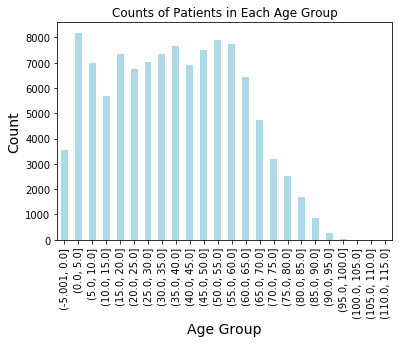

In [21]:
# Creating bins
Age = noshow['Age'].value_counts(bins=(-5,0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110,115), sort=False)
# Dropping First column (from -5 to 0 ) as it is invalid data
Age.drop(noshow.index[0])
# Plotting Bar Graph
Age.plot(kind='bar', animated=True, title = "Counts of Patients in Each Age Group", color=['lightblue']);
plt.xlabel("Age Group",fontsize=14);
plt.ylabel("Count",fontsize=14);

In [22]:
# Create different age groups
noshow.loc[noshow.Age<=9,'AgeCategory'] = '0: 00-09'
noshow.loc[(noshow.Age>9) & (noshow.Age<=19),'AgeCategory'] = '1: 10-19'
noshow.loc[(noshow.Age>19) & (noshow.Age<=29),'AgeCategory'] = '2: 20-29'
noshow.loc[(noshow.Age>29) & (noshow.Age<=39),'AgeCategory'] = '3: 30-39'
noshow.loc[(noshow.Age>39) & (noshow.Age<=49),'AgeCategory'] = '4: 40-49'
noshow.loc[(noshow.Age>49) & (noshow.Age<=59),'AgeCategory'] = '5: 50-59'
noshow.loc[(noshow.Age>59) & (noshow.Age<=69),'AgeCategory'] = '6: 60-69'
noshow.loc[(noshow.Age>69) & (noshow.Age<=79),'AgeCategory'] = '7: 70-79'
noshow.loc[(noshow.Age>79) & (noshow.Age<=89),'AgeCategory'] = '8: 80-89'
noshow.loc[noshow.Age>89,'AgeCategory'] = '9: 90+'

In [23]:
# Counts of patients in each age group
agegroups = noshow.AgeCategory.value_counts().sort_index()
agegroups = agegroups.to_frame("Number of Patients")
agegroups.index.name = "Age Groups"
agegroups

,Number of Patients
Age Groups,
0: 00-09,17465
1: 10-19,12897
2: 20-29,13686
3: 30-39,15148
4: 40-49,14189
5: 50-59,15842
6: 60-69,11858
7: 70-79,5918
8: 80-89,2912


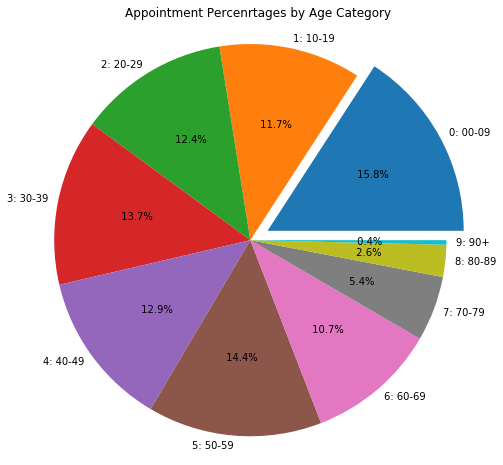

In [24]:
# a pie chart for appointment counts by age categories
pie_data = noshow.AgeCategory.value_counts().sort_index()
label_list = pie_data.index
sizes = pie_data
explode_list = (0.1, 0, 0, 0, 0,0,0,0,0,0) 
fig1, ax1 = plt.subplots(figsize=(8, 8))
ax1.pie(
    sizes, explode = explode_list, labels = label_list, autopct =' %1.1f%%',
    pctdistance = 0.6, labeldistance = 1.05, shadow = False, startangle = 0,
    )
ax1.axis('equal') 
ax1.set_title('Appointment Percenrtages by Age Category')
plt.show()

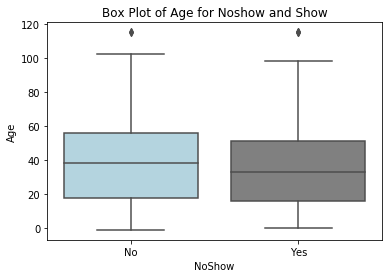

In [25]:
# Create boxplot for the age distribution for show and noshow
age_hist = sns.boxplot(x="NoShow", y="Age", data=noshow, palette=['lightblue', 'grey']).set_title('Box Plot of Age for Noshow and Show')

The boxplot method identified outliers, which we are going to remove. Furthermore, the negative values for age identified before are going to be removed.

In [26]:
#Detect and Remove the Outliers from the Age variable using the same way as the boxplot function did
Q1 = noshow["Age"].quantile(0.25)
Q3 = noshow["Age"].quantile(0.75)
IQR = Q3 - Q1
filter = (noshow["Age"] >= Q1 - 1.5 * IQR) & (noshow["Age"] <= Q3 + 1.5 *IQR)

#Entries before removing
bef = len(noshow)

#Remove Outliers
noshow = noshow.loc[filter]

#Remove all the negative values from the Age variable
noshow = noshow.loc[noshow["Age"] >= 0]

#Entries after removing
aft = len(noshow)
print("We have successfully removed {0} values. The new dataset contains {1} rows.".format(bef-aft,aft))


We have successfully removed 6 values. The new dataset contains 110322 rows.


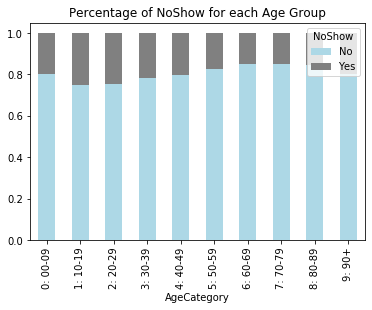

In [27]:
# Crosstab age groups with percentage of No-shows
ct_agegroups = pd.crosstab(noshow.AgeCategory, noshow.NoShow, normalize='index')

#Visualize the probability of no-shows per weekday for Appointment Day and Scheduled Day
ct_agegroups.plot.bar(stacked=True, color=['lightblue', 'grey'])
plt.legend(title='NoShow', loc ='upper right')
plt.title("Percentage of NoShow for each Age Group")
plt.show()

#### Summary of Age Variable 
From the graphs above, we notice that age groups in 10s and 20s have a high number of hospital appointments and high no-show rates. On the other hand, the ’80s people tend to book less appointments and are less likely to not show up.


### 3.6.5 Categorical Variables

In [28]:
#Explore the Neighbourhood variable
#Count number of distinct values
distnumber = noshow['Neighbourhood'].nunique()
print("Number of Different Neighbourhoods: {0}".format(distnumber))

Number of Different Neighbourhoods: 81


In [29]:
#Check number of appointments from each neighbourhood
a = noshow.Neighbourhood.value_counts()
pd.set_option('display.max_rows', 500)
a.to_frame()
print(a)

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4420
JARDIM DA PENHA                3872
ITARARÉ                        3507
CENTRO                         3330
TABUAZEIRO                     3127
SANTA MARTHA                   3113
JESUS DE NAZARETH              2853
BONFIM                         2770
SANTO ANTÔNIO                  2744
CARATOÍRA                      2564
SANTO ANDRÉ                    2562
JABOUR                         2509
SÃO PEDRO                      2433
NOVA PALESTINA                 2261
ILHA DO PRÍNCIPE               2259
ANDORINHAS                     2251
DA PENHA                       2210
ROMÃO                          2205
GURIGICA                       2018
SÃO JOSÉ                       1972
MARUÍPE                        1901
BELA VISTA                     1899
FORTE SÃO JOÃO                 1889
ILHA DE SANTA MARIA            1885
SÃO CRISTÓVÃO                  1834
REDENÇÃO                    

In [30]:
#Calculate the percentages of Show and No show for all neighbourhoods 
pd.set_option('display.max_columns', None)
perc = pd.crosstab(noshow.Neighbourhood, noshow.NoShow).apply(lambda r: r/r.sum(), axis=1)
perc = perc.sort_values(by='Yes', ascending=False)
print(perc)

NoShow                             No       Yes
Neighbourhood                                  
ILHAS OCEÂNICAS DE TRINDADE  0.000000  1.000000
SANTOS DUMONT                0.710361  0.289639
SANTA CECÍLIA                0.725446  0.274554
SANTA CLARA                  0.734653  0.265347
ITARARÉ                      0.737382  0.262618
JESUS DE NAZARETH            0.756046  0.243954
HORTO                        0.760000  0.240000
ILHA DO PRÍNCIPE             0.767154  0.232846
CARATOÍRA                    0.769891  0.230109
ANDORINHAS                   0.770324  0.229676
PRAIA DO SUÁ                 0.770850  0.229150
GURIGICA                     0.774034  0.225966
BENTO FERREIRA               0.774269  0.225731
PARQUE MOSCOSO               0.774843  0.225157
DO MOSCOSO                   0.776156  0.223844
MARUÍPE                      0.776959  0.223041
ENSEADA DO SUÁ               0.777778  0.222222
ILHA DAS CAIEIRAS            0.779756  0.220244
ARIOVALDO FAVALESSA          0.780142  0

In [31]:
noshow.head()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SmsReceived,NoShow,NoShow_d,Female,AgeCategory
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,1,6: 60-69
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,0,5: 50-59
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,1,6: 60-69
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,1,0: 00-09
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,1,5: 50-59


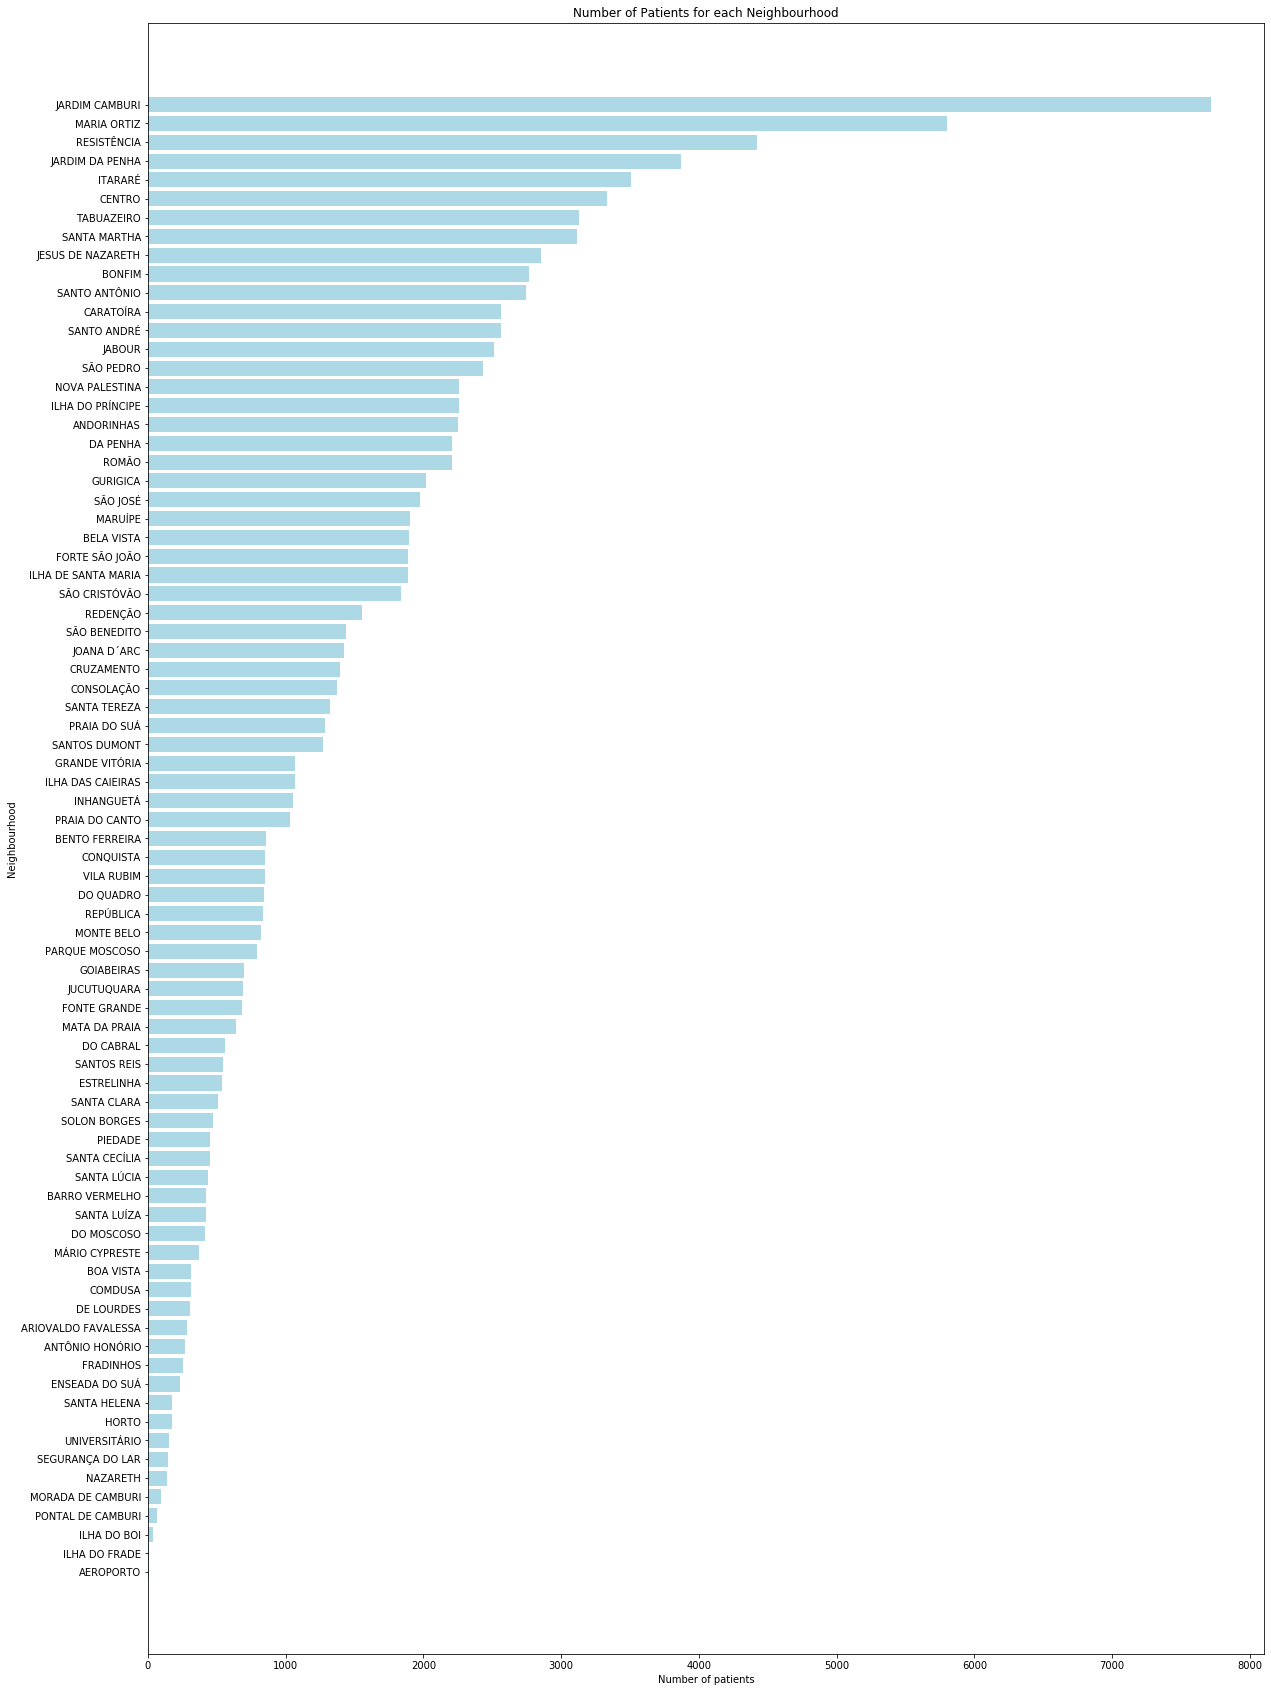

In [32]:
# Group by neighbourhood
neighbourhood_grouped = noshow.groupby(['Neighbourhood', 'NoShow']).count().unstack().PatientID

# Find Count of Shows and No Shows
neighbourhood_grouped["sum"] = neighbourhood_grouped['No'] + neighbourhood_grouped['Yes']

#Sort descending by count of patients for each neighbourhood
neighbourhood_grouped.sort_values(by="sum", inplace=True)
neighbourhood_grouped.dropna(inplace=True)

# Plot
plt.figure(figsize=(20, 30))
plt.barh(neighbourhood_grouped.index, neighbourhood_grouped['sum'].values, color=['lightblue'])
plt.xlabel("Number of patients")
plt.ylabel("Neighbourhood")
plt.title("Number of Patients for each Neighbourhood")
plt.show();

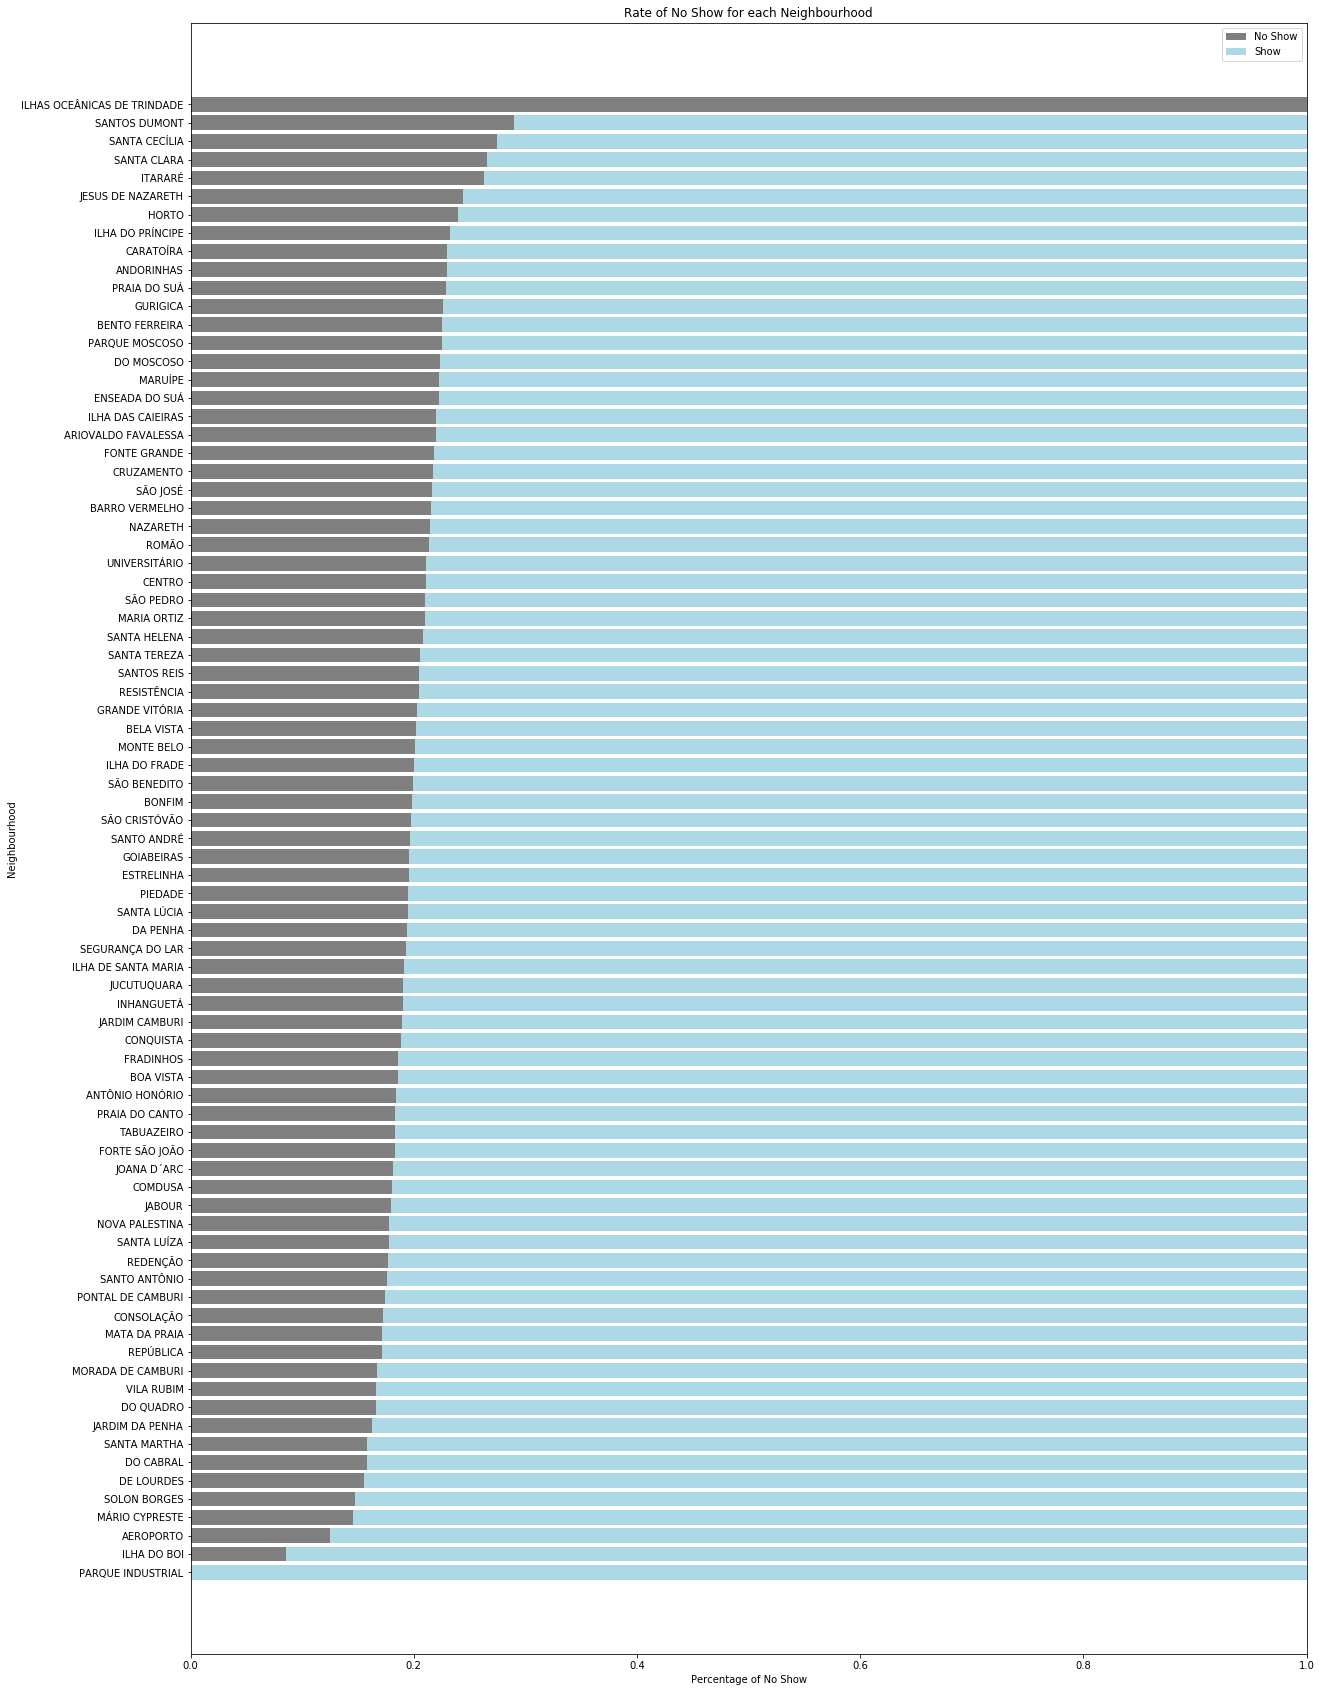

In [33]:
# Crosstab age groups with percentage of No-shows
ct_neighbour = pd.crosstab(noshow.Neighbourhood, noshow.NoShow, normalize='index')
#Sort descending by count of patients for each neighbourhood
ct_neighbour.sort_values(by="Yes", inplace=True)

# Plot
plt.figure(figsize=(20, 30))
plt.barh(ct_neighbour.index, ct_neighbour['Yes'], color=['grey'])
plt.barh(ct_neighbour.index, ct_neighbour['No'], left=ct_neighbour['Yes'], color=['lightblue'])
plt.xlabel("Percentage of No Show")
plt.ylabel("Neighbourhood")
plt.legend(["No Show", "Show"])
plt.title("Rate of No Show for each Neighbourhood")
plt.show();

#### Summary of Neighbourhood
From the two graphs, we notice that most of our patients are from Jardim Bamburi and Maria Ortiz and that Ilhas Oceanicas de Trinidade has the highest percentage of no shows. However, this is not a valid insight as we only have 1 patient from that neighbourhood. The next ones in order are Santos Dumont, Santa Cecilia, Santa Clara, and Itarare.

### 3.6.6 Date/Time variables

In [34]:
#Extracting date and time data
def date_process(df, cols, form=None):
    for col in cols:
        df[col] = pd.to_datetime(df[col]) # seting the column as pandas datetime
        df['weekdayName_'+str(col)] = df[col].dt.weekday_name #extracting week day
        df['weekday_'+str(col)] = df[col].dt.weekday #extracting week day        
        df['day_'+str(col)] = df[col].dt.day # extracting day
        df['month_'+str(col)] = df[col].dt.month # extracting month
        if col == 'ScheduledDay':
            df['hour_'+str(col)] = df[col].dt.hour # extracting hour
        # df[col] = df[col].dt.date.astype('datetime64[ns]')
    return df #returning the df after the transformations

dates = ['AppointmentDay', 'ScheduledDay']
noshow = date_process(noshow, dates)

In [35]:
#Create WaitTime (between day appointment was registered and actual apppointment day)
noshow['ScheduledDate'] = noshow.ScheduledDay.dt.normalize() #ScheduledDate does not consider time, will be used to calculate 
noshow['WaitTime'] = (noshow.AppointmentDay - noshow.ScheduledDate).dt.days

In [36]:
#Show all the observations where appointment time is before scheduled date
noshow.loc[noshow['WaitTime'] < 0]

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SmsReceived,NoShow,NoShow_d,Female,AgeCategory,weekdayName_AppointmentDay,weekday_AppointmentDay,day_AppointmentDay,month_AppointmentDay,weekdayName_ScheduledDay,weekday_ScheduledDay,day_ScheduledDay,month_ScheduledDay,hour_ScheduledDay,ScheduledDate,WaitTime
27033,7.839273e+12,5679978,M,2016-05-10 10:51:53,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,1,0,3: 30-39,Monday,0,9,5,Tuesday,1,10,5,10,2016-05-10,-1
55226,7.896294e+12,5715660,F,2016-05-18 14:50:41,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,1,1,1: 10-19,Tuesday,1,17,5,Wednesday,2,18,5,14,2016-05-18,-1
64175,2.425226e+13,5664962,F,2016-05-05 13:43:58,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,1,1,2: 20-29,Wednesday,2,4,5,Thursday,3,5,5,13,2016-05-05,-1
71533,9.982316e+14,5686628,F,2016-05-11 13:49:20,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,1,1,8: 80-89,Thursday,3,5,5,Wednesday,2,11,5,13,2016-05-11,-6
72362,3.787482e+12,5655637,M,2016-05-04 06:50:57,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes,1,0,0: 00-09,Tuesday,1,3,5,Wednesday,2,4,5,6,2016-05-04,-1


In [37]:
# Drop the observations where appointment time is after scheduled date
noshow.drop(noshow.loc[noshow['WaitTime'] < 0].index, inplace=True) 

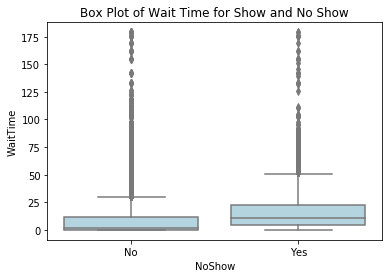

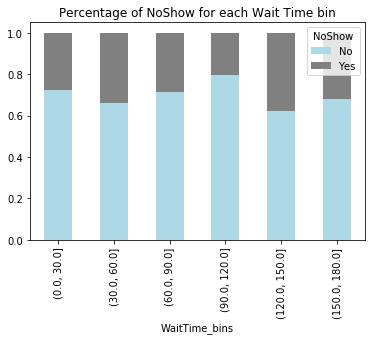

In [38]:
#Explore Appointment and Scheduled Dates

#Explore WaitTime
noshow['WaitTime'].describe()

#Visualize WaiTime and NoShow with boxplot
sns.boxplot(x='NoShow',y='WaitTime',data=noshow,color='lightblue').set_title("Box Plot of Wait Time for Show and No Show")

#Binning the WaitTime
custom_bucket_array = np.linspace(0, 180, 7)
noshow['WaitTime_bins'] = pd.cut(noshow['WaitTime'], custom_bucket_array)

#Visualize WaitTime bins and NoShow
ct_waittime_pct = pd.crosstab(noshow.WaitTime_bins, noshow.NoShow, normalize='index')
ct_waittime_pct.plot.bar(stacked=True, color=['lightblue', 'grey'])
plt.legend(title='NoShow')
plt.title("Percentage of NoShow for each Wait Time bin")
plt.show()

#### Wait time
The boxplot shows that when the time difference increases, patients tend to not show up. Also, from the bar graph, we notice that long wait times have a higher percentage of no-show. 


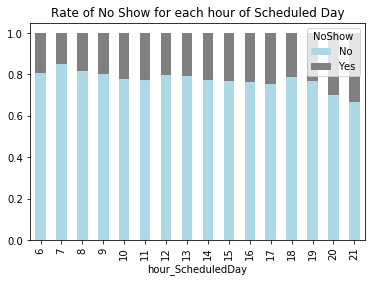

Text(0.5, 1.0, 'Box Plot of hours of Scheduled Day for Show and No Show')

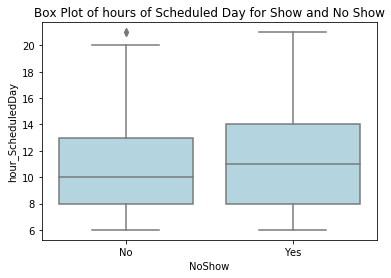

In [39]:
# Crosstab hour of the day of ScheduledDay with percentage of No-shows
ct_schhod_pct = pd.crosstab(noshow.hour_ScheduledDay, noshow.NoShow, normalize='index')
ct_schhod_pct

#Visualize the probability of no-shows per hour of day for Scheduled Day
ct_schhod_pct.plot.bar(stacked=True, color=['lightblue', 'grey'])
plt.legend(title='NoShow', loc = 'upper right')
plt.title("Rate of No Show for each hour of Scheduled Day")
plt.show()

#Visualize the distribution of hour of day for Scheduled Day over No-show in a boxplot
sns.boxplot(x='NoShow',y='hour_ScheduledDay',data=noshow,color='lightblue').set_title("Box Plot of hours of Scheduled Day for Show and No Show")

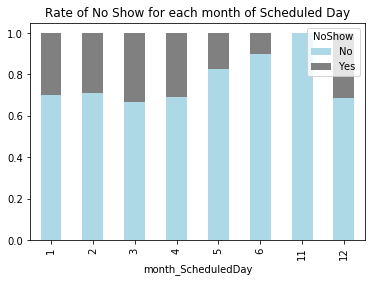

In [40]:
# Crosstab hour of the month of ScheduledDay with percentage of No-shows
ct_schmonth_pct = pd.crosstab(noshow.month_ScheduledDay, noshow.NoShow, normalize='index')
ct_schmonth_pct

#Visualize the probability of no-shows per month for Scheduled Day
ct_schmonth_pct.plot.bar(stacked=True, color=['lightblue', 'grey'])
plt.legend(title='NoShow', loc = 'upper right')
plt.title("Rate of No Show for each month of Scheduled Day")
plt.show()

In [41]:
# Get percentage of No Show for each month of scheduled day
ct_schmonth_pct

NoShow,No,Yes
month_ScheduledDay,,
1,0.700000,0.300000
2,0.710714,0.289286
3,0.669069,0.330931
4,0.690371,0.309629
5,0.825491,0.174509
6,0.899220,0.100780
11,1.000000,0.000000
12,0.688525,0.311475


#### Scheduled Day

##### - Per hour of Scheduled Day:
We find that patients who scheduled appointments early in the morning are less likely to miss their appointments, while patients who scheduled appointments between 8 pm and 9 pm tend to miss their appointments. 

##### - Per month  of Scheduled Day:
The patients who make their appointments in November never miss an appointment. However, this might be because the samples are inadequate. On the other hand, people who make appointments in March and April tend to not show up, based on the graph.


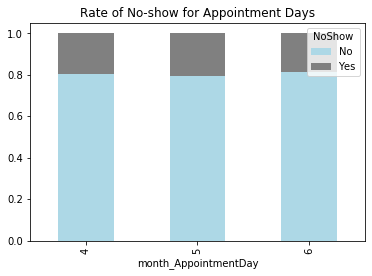

In [42]:
# Crosstab hour of the month of AppointmnetDay with percentage of No-shows
ct_appmonth_pct = pd.crosstab(noshow.month_AppointmentDay, noshow.NoShow, normalize='index')
ct_appmonth_pct

#Visualize the probability of no-shows per month for AppointmentDay
ct_appmonth_pct.plot.bar(stacked=True, color=['lightblue', 'grey'])
plt.legend(title='NoShow', loc = 'upper right')
plt.title("Rate of No-show for Appointment Days")
plt.show()

In [43]:
ct_appmonth_pct

NoShow,No,Yes
month_AppointmentDay,,
4,0.803843,0.196157
5,0.792291,0.207709
6,0.815262,0.184738


#### Appointment Day

#### - Per month for appointment Day:
From the graph of the month of appointment, date reveals the status of patients on the appointment date after they scheduled. It is clear to observe that no matter which month the appointment is made, it won’t change their no-show status.  


### 3.7 Exploration of relationships between variables

Text(0.5, 1.0, 'Box Plot of Wait Time for each month of Scheduled Day')

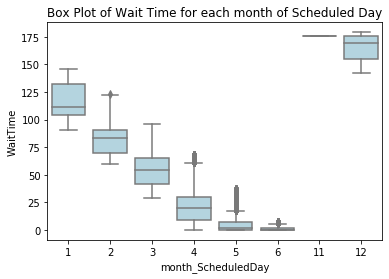

In [44]:
#Plot ScheduledMonth against Waittime
sns.boxplot(x='month_ScheduledDay',y='WaitTime',data=noshow,color='lightblue').set_title("Box Plot of Wait Time for each month of Scheduled Day")

We can see that appointments that are scheduled during December, January have the longest wait time with each consecutive month having less wait time. This can be an indication that the hospital is busiest during Winter and then Spring.

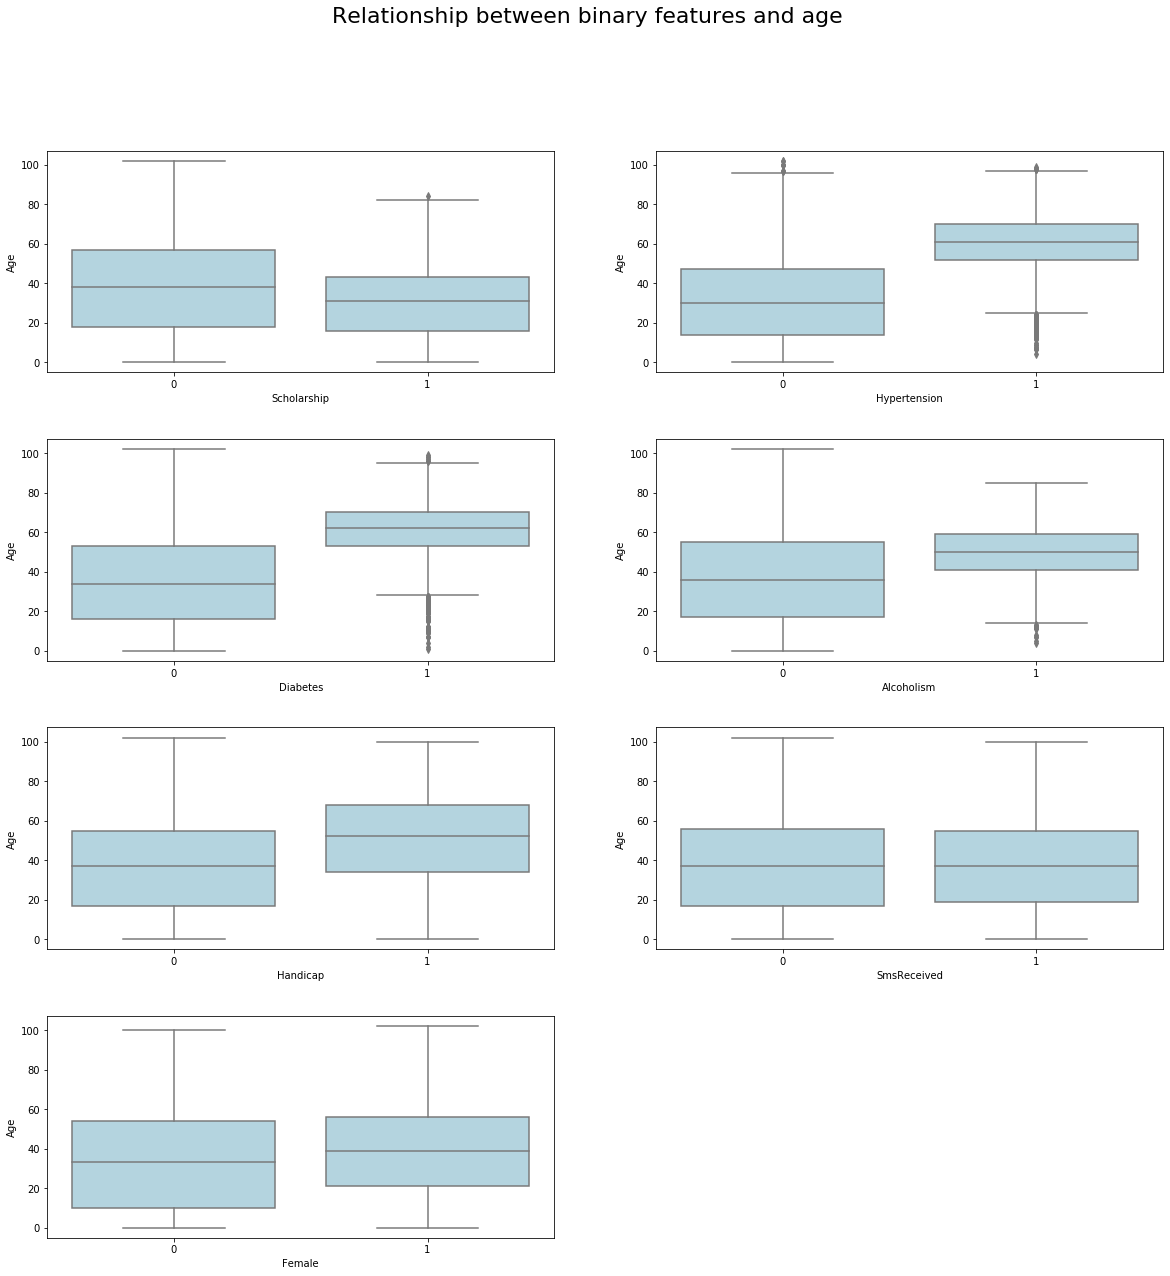

In [45]:
#Plot binary variables against age
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20,20))
fig.subplots_adjust(hspace=0.3)
fig.suptitle('Relationship between binary features and age', fontsize=22)
sns.boxplot(x='Scholarship',y='Age',data=noshow,color='lightblue', ax=axes[0][0])
sns.boxplot(x='Hypertension',y='Age',data=noshow,color='lightblue', ax=axes[0][1])
sns.boxplot(x='Diabetes',y='Age',data=noshow,color='lightblue', ax=axes[1][0])
sns.boxplot(x='Alcoholism',y='Age',data=noshow,color='lightblue', ax=axes[1][1])
sns.boxplot(x='Handicap',y='Age',data=noshow,color='lightblue', ax=axes[2][0])
sns.boxplot(x='SmsReceived',y='Age',data=noshow,color='lightblue', ax=axes[2][1])
sns.boxplot(x='Female',y='Age',data=noshow,color='lightblue', ax=axes[3][0])
axes[3][1].set_visible(False)
plt.show()

We notice that older patients are more likely to suffer from hypertension and diabetes. The rest of the variables do not seem to have a significant difference accross different ages.

SmsReceived,0,1
WaitTime_bins,,
"(0.0, 30.0]",0.527812,0.472188
"(30.0, 60.0]",0.388640,0.611360
"(60.0, 90.0]",0.353255,0.646745
"(90.0, 120.0]",0.348485,0.651515
"(120.0, 150.0]",0.448276,0.551724
"(150.0, 180.0]",0.339286,0.660714


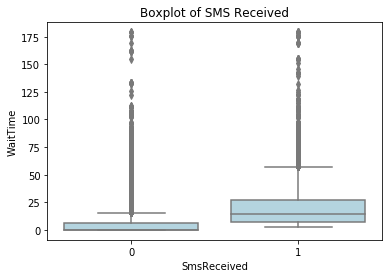

In [46]:
# Crosstab WaitTime with percentage of SmsReceived
ct_smsWT = pd.crosstab(noshow.WaitTime_bins, noshow.SmsReceived, normalize='index')
sns.boxplot(x='SmsReceived',y='WaitTime',data=noshow,color='lightblue').set_title("Boxplot of SMS Received")
ct_smsWT

We can see from the table and the graph that patients with a longer wait time are more likely to have received an SMS. This might be an indication of when patients receive an SMS.

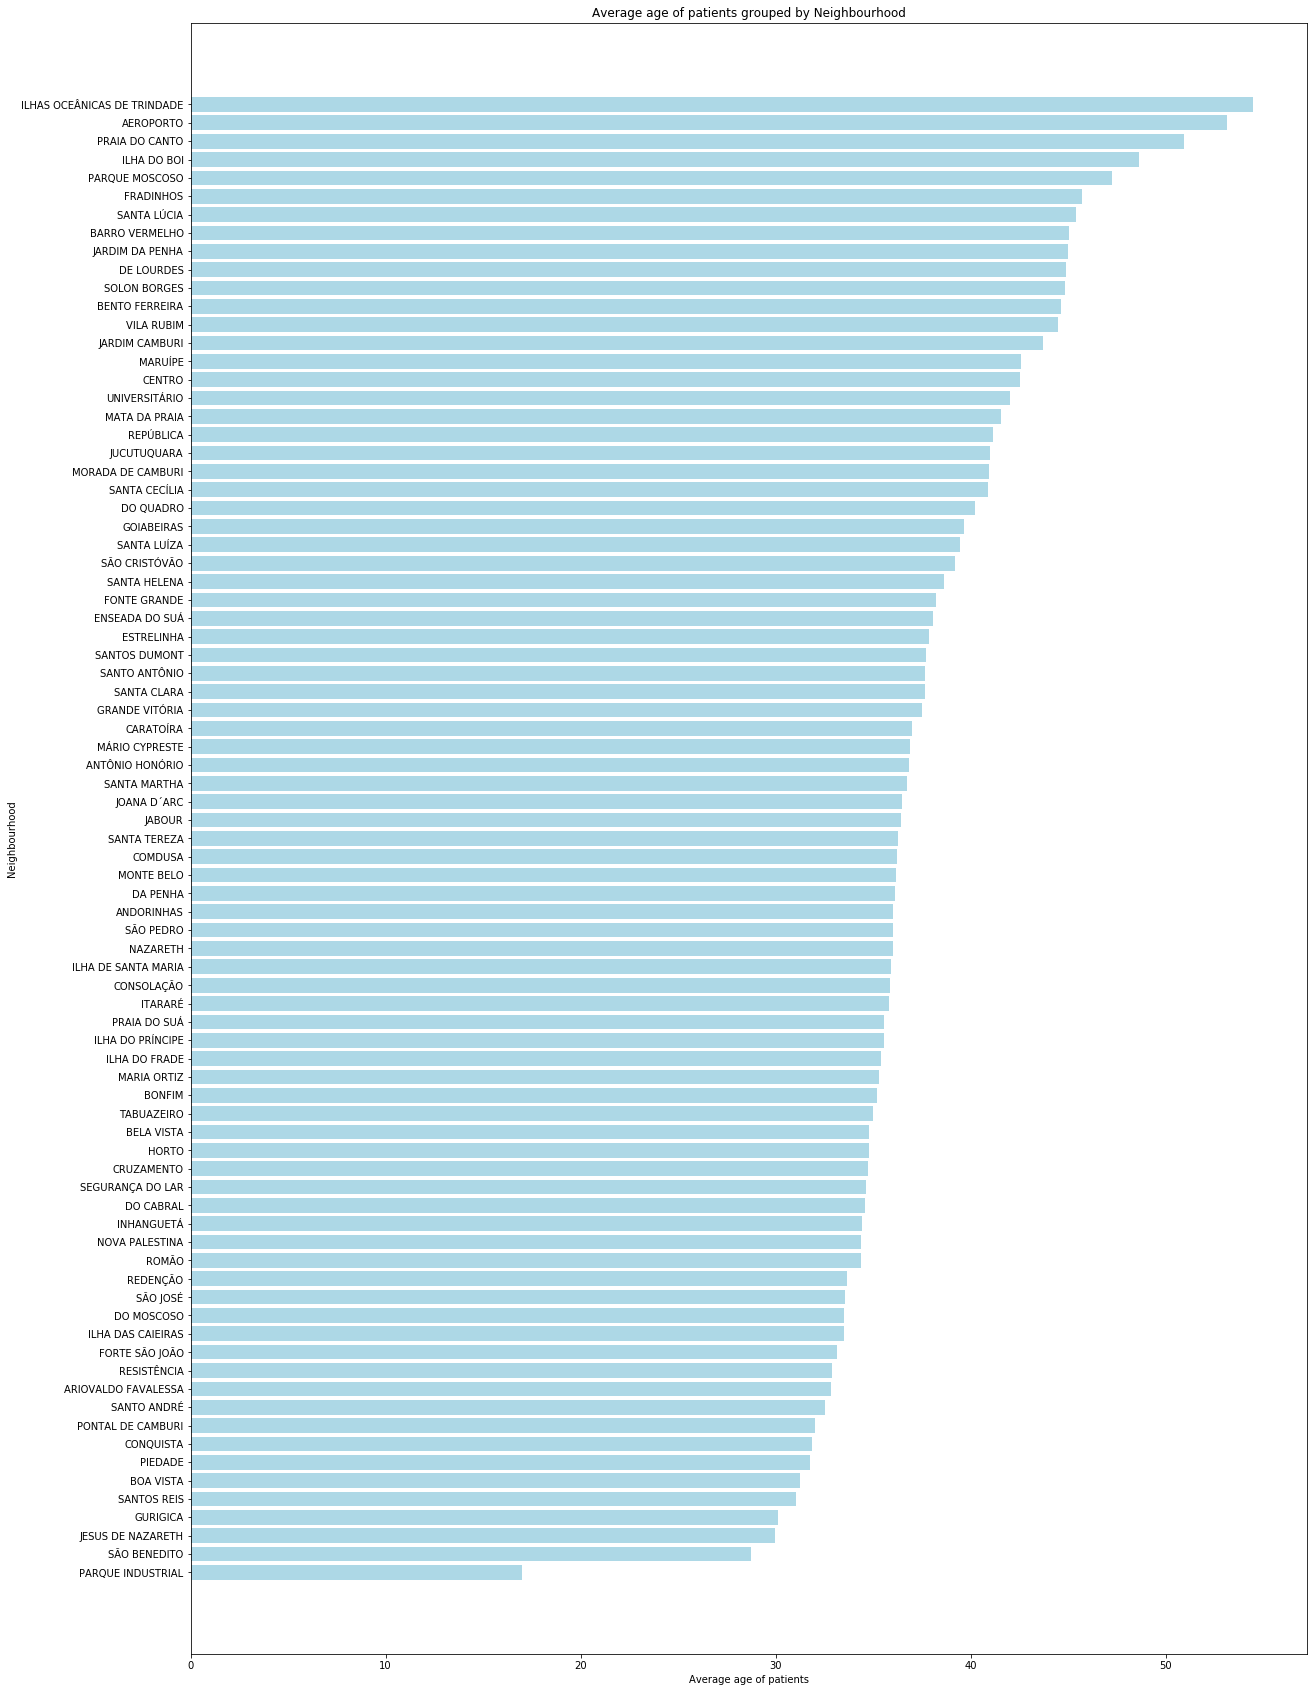

In [144]:
NB_Age = noshow.groupby('Neighbourhood', as_index=False).mean()
NB_Age.sort_values(by=["Age"], inplace=True)

plt.figure(figsize=(20, 30))
plt.barh(NB_Age["Neighbourhood"], NB_Age["Age"], color=['lightblue'])
plt.xlabel("Average age of patients")
plt.ylabel("Neighbourhood")
plt.title("Average age of patients grouped by Neighbourhood")
plt.show();

In the plot above we can see the neighbourhoods with the higher average age. This might be important because as we observed earlier younger patients are more likely to not show up.

## 4.0 Data Preparation for Modelling

In [145]:
# Seperate hours into different groups
noshow.loc[noshow.hour_ScheduledDay<=9,'HourCategory'] = 'Morning'
noshow.loc[(noshow.hour_ScheduledDay>9) & (noshow.hour_ScheduledDay<=13),'HourCategory'] = 'Noon'
noshow.loc[(noshow.hour_ScheduledDay>13) & (noshow.hour_ScheduledDay<=17),'HourCategory'] = 'Afternoon'
noshow.loc[noshow.hour_ScheduledDay>17,'HourCategory'] = 'Evening'

noshow.HourCategory.value_counts()

Morning      48886
Noon         33898
Afternoon    25609
Evening       1930
Name: HourCategory, dtype: int64

In [146]:
#Transform hour bins into dummies
pd.options.display.max_columns=None
#noshow.head()
noshow_new = pd.get_dummies(noshow,columns=['HourCategory', 'Neighbourhood', 'month_ScheduledDay', 'weekdayName_ScheduledDay', 'weekdayName_AppointmentDay'])

In [147]:
# Export the data into a new csv to be re-imported for the modelling section
noshow_new = noshow_new.drop(['PatientID', 'AppointmentID',"Gender","ScheduledDay","AppointmentDay", "NoShow", "AgeCategory", "ScheduledDate","weekday_AppointmentDay","day_AppointmentDay","month_AppointmentDay","weekday_ScheduledDay","day_ScheduledDay","hour_ScheduledDay","WaitTime_bins"], axis=1)
export_csv = noshow_new.to_csv (r'noshow_dummies.csv', index = None, header=True)

## 5.0 Building Models for Prediction

Now we are going to start training models that will predict No Shows. This is a typical Binary Classification problem, and will be tackled by training a Logistic Regression model, a Decion Tree Classifier and a Random Forest Classifier.

### 5.1 Further Data Preparation

In [149]:
# Load dataset and show columns and first rows
noshow = pd.read_csv("noshow_dummies.csv")
noshow.head()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SmsReceived,NoShow_d,Female,WaitTime,HourCategory_Afternoon,HourCategory_Evening,HourCategory_Morning,HourCategory_Noon,Neighbourhood_AEROPORTO,Neighbourhood_ANDORINHAS,Neighbourhood_ANTÔNIO HONÓRIO,Neighbourhood_ARIOVALDO FAVALESSA,Neighbourhood_BARRO VERMELHO,Neighbourhood_BELA VISTA,Neighbourhood_BENTO FERREIRA,Neighbourhood_BOA VISTA,Neighbourhood_BONFIM,Neighbourhood_CARATOÍRA,Neighbourhood_CENTRO,Neighbourhood_COMDUSA,Neighbourhood_CONQUISTA,Neighbourhood_CONSOLAÇÃO,Neighbourhood_CRUZAMENTO,Neighbourhood_DA PENHA,Neighbourhood_DE LOURDES,Neighbourhood_DO CABRAL,Neighbourhood_DO MOSCOSO,Neighbourhood_DO QUADRO,Neighbourhood_ENSEADA DO SUÁ,Neighbourhood_ESTRELINHA,Neighbourhood_FONTE GRANDE,Neighbourhood_FORTE SÃO JOÃO,Neighbourhood_FRADINHOS,Neighbourhood_GOIABEIRAS,Neighbourhood_GRANDE VITÓRIA,Neighbourhood_GURIGICA,Neighbourhood_HORTO,Neighbourhood_ILHA DAS CAIEIRAS,Neighbourhood_ILHA DE SANTA MARIA,Neighbourhood_ILHA DO BOI,Neighbourhood_ILHA DO FRADE,Neighbourhood_ILHA DO PRÍNCIPE,Neighbourhood_ILHAS OCEÂNICAS DE TRINDADE,Neighbourhood_INHANGUETÁ,Neighbourhood_ITARARÉ,Neighbourhood_JABOUR,Neighbourhood_JARDIM CAMBURI,Neighbourhood_JARDIM DA PENHA,Neighbourhood_JESUS DE NAZARETH,Neighbourhood_JOANA D´ARC,Neighbourhood_JUCUTUQUARA,Neighbourhood_MARIA ORTIZ,Neighbourhood_MARUÍPE,Neighbourhood_MATA DA PRAIA,Neighbourhood_MONTE BELO,Neighbourhood_MORADA DE CAMBURI,Neighbourhood_MÁRIO CYPRESTE,Neighbourhood_NAZARETH,Neighbourhood_NOVA PALESTINA,Neighbourhood_PARQUE INDUSTRIAL,Neighbourhood_PARQUE MOSCOSO,Neighbourhood_PIEDADE,Neighbourhood_PONTAL DE CAMBURI,Neighbourhood_PRAIA DO CANTO,Neighbourhood_PRAIA DO SUÁ,Neighbourhood_REDENÇÃO,Neighbourhood_REPÚBLICA,Neighbourhood_RESISTÊNCIA,Neighbourhood_ROMÃO,Neighbourhood_SANTA CECÍLIA,Neighbourhood_SANTA CLARA,Neighbourhood_SANTA HELENA,Neighbourhood_SANTA LUÍZA,Neighbourhood_SANTA LÚCIA,Neighbourhood_SANTA MARTHA,Neighbourhood_SANTA TEREZA,Neighbourhood_SANTO ANDRÉ,Neighbourhood_SANTO ANTÔNIO,Neighbourhood_SANTOS DUMONT,Neighbourhood_SANTOS REIS,Neighbourhood_SEGURANÇA DO LAR,Neighbourhood_SOLON BORGES,Neighbourhood_SÃO BENEDITO,Neighbourhood_SÃO CRISTÓVÃO,Neighbourhood_SÃO JOSÉ,Neighbourhood_SÃO PEDRO,Neighbourhood_TABUAZEIRO,Neighbourhood_UNIVERSITÁRIO,Neighbourhood_VILA RUBIM,month_ScheduledDay_1,month_ScheduledDay_2,month_ScheduledDay_3,month_ScheduledDay_4,month_ScheduledDay_5,month_ScheduledDay_6,month_ScheduledDay_11,month_ScheduledDay_12,weekdayName_ScheduledDay_Friday,weekdayName_ScheduledDay_Monday,weekdayName_ScheduledDay_Saturday,weekdayName_ScheduledDay_Thursday,weekdayName_ScheduledDay_Tuesday,weekdayName_ScheduledDay_Wednesday,weekdayName_AppointmentDay_Friday,weekdayName_AppointmentDay_Monday,weekdayName_AppointmentDay_Saturday,weekdayName_AppointmentDay_Thursday,weekdayName_AppointmentDay_Tuesday,weekdayName_AppointmentDay_Wednesday
0,62,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,56,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
2,62,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,8,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
4,56,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [150]:
# Labels are the values we want to predict
y = np.array(noshow['NoShow_d'])

# Remove the labels from the features
# axis 1 refers to the columns
x = noshow.drop('NoShow_d', axis = 1)

# For logistic regression we are dropping one dummy for each category for baseline
x_logistic = noshow.drop(['NoShow_d', 'HourCategory_Afternoon','month_ScheduledDay_1', 'Neighbourhood_AEROPORTO', 'weekdayName_ScheduledDay_Friday'], axis=1)

# Saving feature names for later use
feature_list = list(x.columns)

#Convert to numpy array
#x = np.array(x)

# Split the data into training and testing sets
# 75% of the data will be our training set and 25% the test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

# Now for logistic
X_train_logit, X_test_logit, y_train_logit, y_test_logit = train_test_split(x_logistic, y, test_size=0.25, random_state=1)

In [151]:
# Check the shape of our training and test sets
print('x-train:', X_train.shape)
print('y-train:', y_train.shape)
print('x-test:', X_test.shape)
print('y-test:', y_test.shape)

x-train: (82742, 114)
y-train: (82742,)
x-test: (27581, 114)
y-test: (27581,)


### 5.2 Logistic Regression 

In [152]:
# Run the logit model on the train data
logitmodel = sm.Logit(y_train_logit, X_train_logit)

# Fit the model
results = logitmodel.fit(method='bfgs')
print(results.summary())

         Current function value: 0.475531
         Iterations: 35
         Function evaluations: 39
         Gradient evaluations: 39
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                82742
Model:                          Logit   Df Residuals:                    82632
Method:                           MLE   Df Model:                          109
Date:                Wed, 11 Dec 2019   Pseudo R-squ.:                 0.05486
Time:                        19:06:54   Log-Likelihood:                -39346.
converged:                      False   LL-Null:                       -41630.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Age           

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


### 5.2.1 Metrics and Overfitting Evaluation for Logistic

In [36]:
#Predict outcome based on training data and check accuracy
y_pred_train = results.predict(X_train_logit).round().astype(int)
print('Accuracy on training data: ',metrics.accuracy_score(y_train_logit, y_pred_train))

#Predict outcome based on test data and get accuracy
y_pred_test = results.predict(X_test_logit).round().astype(int)
print('Accuracy on test data: ',metrics.accuracy_score(y_test_logit, y_pred_test))

Accuracy on training data:  0.796789828009234
Accuracy on test data:  0.7949601160261058


Our logistic regression model performed very similarly on the training and test data, therefore we do not have overfitting.

In [38]:
# Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_test)
cnf_matrix

array([[21860,   106],
       [ 5549,    65]])

### 5.3 Decision Tree Classifier

In [65]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clfit = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clfit.predict(X_test)

#Get Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7331762146482959


### 5.3.1 Tuning Hyperparameters of Decision Tree and Evaluating Metrics

In [55]:
# Now lets try to optimise the Accuracy of the Decision Tree 
dtc = DecisionTreeClassifier()

# Setting the different parameters to be tested and their values to be tested
parameter_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [2,4,6,8,10,12,14,16,18,20]}

# Running 
grid_search = GridSearchCV(dtc, param_grid=parameter_grid, cv=10, scoring = "accuracy")

grid_search.fit(x, y)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

dtc = grid_search.best_estimator_
dtc

Best score: 0.7982178630673423
Best parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 8, 'splitter': 'random'}


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='random')

Our aim was done with success as we have improved the accuracy by roughly 6%. Now we have the parameters for a model with the best accuracy. Next step is to check for overfitting, by comparing accuracy of the model on training set with the accuracy on the test set.

In [66]:
# Run Model with best parameters and check for overfitting
clf = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=16, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='random')
# Fit it on train data
clfit = clf.fit(X_train,y_train)

# Predict on test data and get accuracy
y_pred = clfit.predict(X_test)
print("Accuracy of model on test data:",metrics.accuracy_score(y_test, y_pred))

# Check overfitting by predicting on train data and compare accuracy
y_pred_overfit = clfit_overfit.predict(X_train)
print("Accuracy of model on train data: ",metrics.accuracy_score(y_train, y_pred_overfit))

Accuracy of model on test data: 0.7964467005076142
Accuracy of model on train data:  0.798687407085101


After comparing the afforementioned, we can conclude that our model is successful with no overfitting and with 79.64% accuracy on the test data.

In [60]:
# All Model Metrics
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.7964467005076142
[[21966     0]
 [ 5614     0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     21966
           1       0.00      0.00      0.00      5614

    accuracy                           0.80     27580
   macro avg       0.40      0.50      0.44     27580
weighted avg       0.63      0.80      0.71     27580



/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### 5.3.2 Tree Visualisation

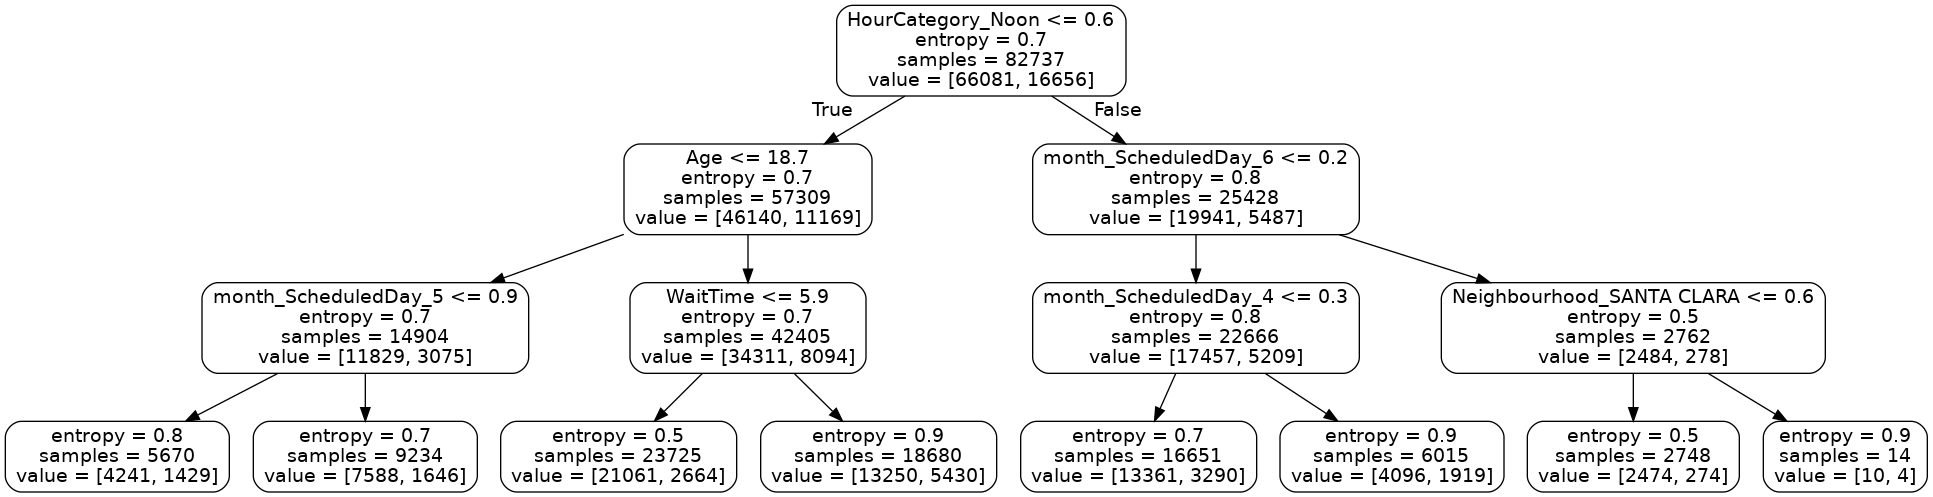

In [81]:
# Visualise the tree and export it as an image
# Export the image to a dot file
export_graphviz(clfit, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# Write graph to a png file
graph.write_png('tree.png')

#Display Image
Image("tree.png")

### 5.4 Random Forest Classifier

In [154]:
#Instantiate Random Forest model with 100 trees
rf = RandomForestClassifier(n_estimators = 100, random_state = 1)
rf.fit(X_train, y_train);
y_pred = rf.predict(X_test)
print("Accuracy of model on test data: ",metrics.accuracy_score(y_test, y_pred))
y_pred = rf.predict(X_train)
print("Accuracy of model on train data: ",metrics.accuracy_score(y_train, y_pred))

Accuracy of model on test data:  0.7910518110293318
Accuracy of model on train data:  0.9926397718208407


We can clearly see that we have a case of overfitting. IT is going to be treated together with the tuning of the hyperparameters.

### 5.3.1 Tuning Hyperparameters of Random Forest and eliminate Overfitting

In [11]:
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(rf, hyperF, cv = 3, verbose = 1, n_jobs = -1)

gridF.fit(X_train, y_train)

y_pred_optimised = gridF.predict(X_test)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.9min
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 18.4min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 47.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 102.6min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 200.1min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 256.8min finished


Accuracy: 0.7908992023205221


In [12]:
# Check accuracy of optimal model on test data
y_pred_optimised = gridF.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred_optimised))

Accuracy: 0.8019579405366207


In [13]:
# Check accuracy of model on train data
y_pred_optimised_of = gridF.predict(X_train)
print("Accuracy: ",metrics.accuracy_score(y_train, y_pred_optimised_of))

Accuracy: 0.8925390091494736


The accuracy improved by 1% but there is some overfitting since accuracy on training is 9% higher than the test. Since last gridsearch was computationally expensive, we are going to test each parameter manually by trying different values and plot their impact on accuracy.

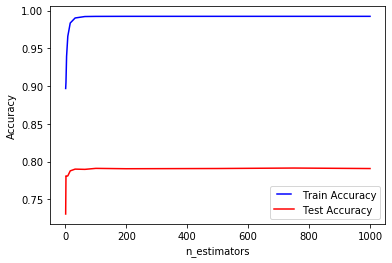

In [22]:
# Now we are going to check each parameter and how it affects accuracy

# Define different number of trees to test
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200, 500, 750, 1000]
train_results = []
test_results = []

# Run the random forest for all the number of trees defined above and get all accuracies
for estimator in n_estimators:
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   accuracy = metrics.accuracy_score(y_train, train_pred)
   train_results.append(accuracy)
   y_pred = rf.predict(X_test)
   accuracy = metrics.accuracy_score(y_test, y_pred)
   test_results.append(accuracy)

# Plot the accuracy obtained against all the number of trees tested
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label='Train Accuracy')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('n_estimators')
plt.show()

Accuracy converges really fast when increasing number of trees. Therefore we are going to use 100 trees that are fast but not too few.

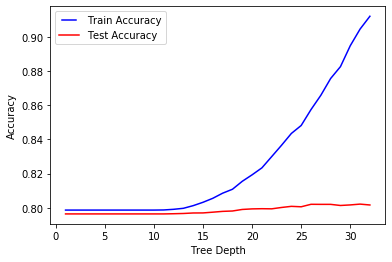

In [24]:
# Same as above but we define the max_depth parameter
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []

# Run all models with different max_depth
for max_depth in max_depths:
   rf = RandomForestClassifier(max_depth = max_depth, n_estimators = 100, n_jobs=-1)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   accuracy = metrics.accuracy_score(y_train, train_pred)
   train_results.append(accuracy)
   y_pred = rf.predict(X_test)
   accuracy = metrics.accuracy_score(y_test, y_pred)
   test_results.append(accuracy)

# Plot all accuracies against the different max_depth
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train Accuracy')
line2, = plt.plot(max_depths, test_results, 'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree Depth')
plt.show()

We can see that max_depth increases accuracy only for the validation set after 12. Therefore, this is the parameter that is causing the overfitting problem. Thus, we are going to use 12 for our final model to eliminate overfitting.

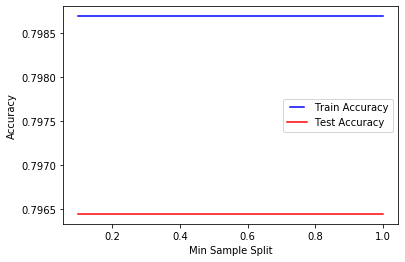

In [25]:
# Once again for the min_sample_splits hyperparameter
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []

# Run for all
for min_samples_split in min_samples_splits:
   rf = RandomForestClassifier(min_samples_split=min_samples_split, n_estimators = 100, n_jobs=-1)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   accuracy = metrics.accuracy_score(y_train, train_pred)
   train_results.append(accuracy)
   y_pred = rf.predict(X_test)
   accuracy = metrics.accuracy_score(y_test, y_pred)
   test_results.append(accuracy)

#Plot
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train Accuracy')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Min Sample Split')
plt.show()

min_samples split does not improve accuracy therefore we are going to keep the default one

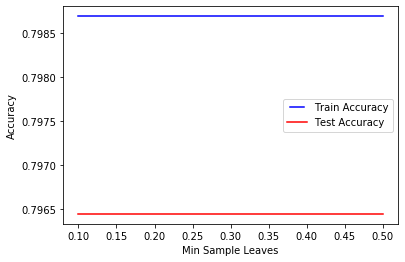

In [26]:
# Now for min_samples leaf
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []

# Run for all parameters
for min_samples_leaf in min_samples_leafs:
   rf = RandomForestClassifier(min_samples_leaf=min_samples_leaf, n_estimators = 100, n_jobs=-1)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   accuracy = metrics.accuracy_score(y_train, train_pred)
   train_results.append(accuracy)
   y_pred = rf.predict(X_test)
   accuracy = metrics.accuracy_score(y_test, y_pred)
   test_results.append(accuracy)

# Plot accuracies
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label='Train Accuracy')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Min Sample Leaves')
plt.show()

min_sample_leafs does not improve accuracy therefore we are going to keep the default one

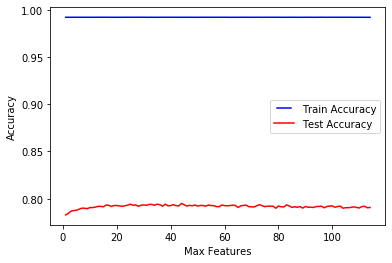

In [5]:
# Last hyperparameter to test is max_features
max_features = list(range(1,noshow.shape[1]))
train_results = []
test_results = []

# Run models with different max features each time
for max_feature in max_features:
   rf = RandomForestClassifier(max_features=max_feature, n_estimators = 100, n_jobs=-1)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   accuracy = metrics.accuracy_score(y_train, train_pred)
   train_results.append(accuracy)
   y_pred = rf.predict(X_test)
   accuracy = metrics.accuracy_score(y_test, y_pred)
   test_results.append(accuracy)

# Plot the accuracies against the max features
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, 'b', label='Train Accuracy')
line2, = plt.plot(max_features, test_results, 'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Max Features')
plt.show()

max_features does not improve accuracy, thus keeping default. Now we are going to train our final model with the best parameters by using gridsearch to apply a 10-fold cross validation.

In [155]:
# Now we are going to run a final model with good accuracy that avoids overfitting
n_estimators = [100]
max_depth = [12]

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth)

gridF = GridSearchCV(rf, hyperF, cv = 10, verbose = 1, n_jobs = -1)

gridF.fit(X_train, y_train)

y_pred_optimised = gridF.predict(X_test)
print("Accuracy of prediction on test set:",metrics.accuracy_score(y_test, y_pred_optimised))

y_pred_overfit = gridF.predict(X_train)
print("Accuracy of prediction on train set:",metrics.accuracy_score(y_train, y_pred_overfit))

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   22.4s finished


Accuracy of prediction on test set: 0.7984844639425691
Accuracy of prediction on train set: 0.798191970220686


In [156]:
# Confusion Matrix
metrics.confusion_matrix(y_test, y_pred_optimised)

array([[22020,     0],
       [ 5558,     3]])

### 5.3.2 Feature Importance from Random Forest

In [157]:
# Get feature importance from the random forest above
feature_importances1 = pd.DataFrame(gridF.best_estimator_.feature_importances_,
                                   index = x.columns,
                                    columns=['Importance']).sort_values('Importance', ascending=False)
feature_importances1

,Importance
WaitTime,0.396049
Age,0.100273
month_ScheduledDay_4,0.062615
SmsReceived,0.062456
month_ScheduledDay_6,0.038917
month_ScheduledDay_5,0.038322
HourCategory_Morning,0.017712
weekdayName_ScheduledDay_Friday,0.015310
Female,0.012971
month_ScheduledDay_3,0.012770


### Summary of Modeling 
<br> 
<u>Key features from random forest</u>
<br><br>
From the random forest model, we wanted to identify which variables are important as critical predictors. We found the top five most important features to be ‘WaitTime’, ‘Age’, and ‘month_Scheduled Day_4’, SmsReceived’ and ‘month_ScheduledDay_6’. 
<br><br>
<u>Interpretation of regression</u>
<br><br>
We also use logistic regression for modelling since it is appropriate for binary variables.
In the regression results, we only considered the significant variable and below are significant and important variables from regression and random forest model:  WaitTime, Age, SmsReceived, month_ScheduledDay_5, month_ScheduledDay_6.<br>
Judging by these common variables, we can conclude that these variables are vital predictors to predict whether patients are going to show up or not. When we recommend business strategies to improve the no-show rate of patients, we should focus on the patient's age, waiting time, SMS, and in which month the patients scheduled for their appointment.
<br>
<br>
- Age: -0.0066<br>
The coefficient Age explains that younger patients are more likely to not show up. <br>
- SmsReceived: 0.3147<br>
The coefficient of SmsReceived is positive. It indicates that patients who received an SMS tend to miss their appointment more than the patients who did not receive an SMS.<br>
- WaitTime: 0.0174<br>
The meaning of the coefficient WaitTime is that when the length of time between appointment day and the scheduled day increases, patients are more likely to not show up.<br>
- Month_ScheduledDay_5: - 0.6610<br>
The coefficient of the month_ScheduledDay_5 is negative. It means that the patient who scheduled their appointment in May is more likely to show up compared to a patient who scheduled their appointment in January.<br>
- Month_ScheduledDay_6: - 1.2236<br>
The coefficient of the month_ScheduledDay_6 is negative. It means that patients who scheduled their appointment in June are more likely to show up compared to a patient who scheduled their appointment in January.


## 6.0 Conclusions 
### 6.1 Limitations 
<br>
Based on our descriptive and predictive analysis, there are several limitations about the models being used and assumptions being made that we need to clarify:<br><br>
- Firstly, it is about the dataset. We believe that we can achieve a better accuracy on our predictive model if the dataset is bigger or we have more explanatory variables. Although our accuracy is around 80%, if we have more observations and features, the results would be more accurate, which will add more value to our business.<br><br>
- More data and further investigation are required for SMS Received, because this variable is an important factor that caused people to not show up based on our findings. However, it is counterintuitive to say that people who received the SMS won’t show up. Although we researched on this variable, it is still hard to suggest any productive actions about this variable without further investigation.
<br><br>
- Finally, we cannot make any causal inferences from our prediction model, which limits our ability to make recommendations on the causes themselves. Our prediction model simply give us an indication about the correlations between variables. We would have to design and conduct experiments in order to determine the causal relationship between our explanatory variables and the dependent variable.


### 6.2 Business Recommendations
<br>
First, we would recommend our client to give patients a reminder call one day before their appointment to check whether they can show up or not. If they can’t, we can reschedule their appointment and reduce the potential sunk cost (Edelson, 2019). There is no need to make a phone call to every patient, as this would be costly. Based on the importance levels reported by our prediction model, we would recommend our client to make a call for patients who have the following characteristics: aged from 10 to 20 and have a waiting time longer than 1 week.
<br><br>
Secondly, because people normally don't show up when they don’t think it’s a big deal and they don’t suffer any loss from not showing up (Kumar, 2019), for patients who have the features we mentioned above, our suggestion is to let them pay the appointment fee or part of the treatment fee in advance. Hence, it might decrease the probability of patients not showing up directly. If patients do not attend without rescheduling their appointments or cancelling them in advance, the fee they paid before will not be refundable and will become the compensation for our sunk cost.
<br><br>
Finally, acknowledgement and reward for patients who show up punctually is necessary to encourage they show up on time in the future (PatientPop, 2018). 

### 6.3 Final summary
Overall, we cleaned, transformed and explored the data to be able to provide the client with meaningful insights about their patients. Then we built several models to be able to predict the likelihood of a patient not showing up based on their characteristics. The model we ended up choosing was random forest with an accuracy of 80%, so the hospital can intercept possible no-shows. From the feature importance levels reported by the random forest model and the regression results from the logistic model, we were able to come up with suitable business recommendations.

## 7.0 References
<br>
Edelson, C. (2019). The Best Ways to Reduce Patient No-Shows in 2019. [online] Blog.pcc.com. Available at: https://blog.pcc.com/the-best-ways-to-reduce-patient-no-shows-in-2019 [Accessed 11 Dec. 2019].
<br><br>
PatientPop. (2018). 5 Reasons Patients No-Show for Healthcare Appointments | PatientPop. [online] Available at: https://www.patientpop.com/blog/running-a-practice/patient-experience/5-reasons-patients-no-show-for-healthcare-appointments/ [Accessed 11 Dec. 2019].
<br><br>
Kumar, R. (2019). Reduce No-Show Appointments And Improve Medical Practice Revenue. [online] Software Advice. Available at: https://www.softwareadvice.com/resources/reduce-no-show-appointments/ [Accessed 11 Dec. 2019].

## Appendix
### Jira (Project Management)
<br>
The project management was done through Jira. Our group split our project into different tasks and sub-tasks on Jira and distributed them almost equally to each member based on roles, so that we could work together regardless of time and place. Several tasks were removed and some tasks were added after our weekly meeting, so the effectiveness and efficiency could be ensured. Each member changed the status of their tasks (to do, in progress and done) after they finished their tasks on Jira, so we could ensure that everyone was working on the same page and making progress. All in all, Jira facilitated our process of managing the project and served as a great communication tool.